<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%205/Nerflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/netflix_titles.csv")

# Konversi date_added menjadi datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Tambahkan kolom tahun dan bulan penambahan
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Ekstraksi angka dan tipe durasi
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

# Isi missing values
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Unknown',
}, inplace=True)


In [3]:
# Cek tipe konten
print(df['type'].value_counts())

# Cek negara dengan konten terbanyak
print(df['country'].value_counts().head(10))

# Cek rating terbanyak
print(df['rating'].value_counts().head(10))

# Cek tahun rilis
print(df['release_year'].value_counts().sort_index().tail())

# Cek tahun penambahan ke Netflix
print(df['year_added'].value_counts().sort_index())

# Cek jenis durasi
print(df['duration_type'].value_counts())

# Genre terbanyak
from collections import Counter
genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)
print(genre_counts.most_common(10))

# Sutradara terbanyak
print(df['director'].value_counts().head(10))


type
Movie      3464
TV Show    1933
TV Sh         1
Name: count, dtype: int64
country
United States     1545
Unknown            663
India              602
Japan              203
United Kingdom     190
South Korea        138
Spain              110
Canada              89
France              84
Nigeria             82
Name: count, dtype: int64
rating
TV-MA    2246
TV-14    1373
TV-PG     465
R         367
TV-Y      230
PG-13     226
TV-Y7     209
TV-G      144
PG        123
G          13
Name: count, dtype: int64
release_year
2017.0    511
2018.0    877
2019.0    950
2020.0    948
2021.0    591
Name: count, dtype: int64
year_added
2017.0     297
2018.0     871
2019.0    1152
2020.0    1607
2021.0    1470
Name: count, dtype: int64
duration_type
min        3464
Season     1258
Seasons     675
Name: count, dtype: int64
[('International Movies', 1755), ('Dramas', 1426), ('Comedies', 1025), ('International TV Shows', 1000), ('TV Dramas', 576), ('Action & Adventure', 464), ('TV Comedies', 436),

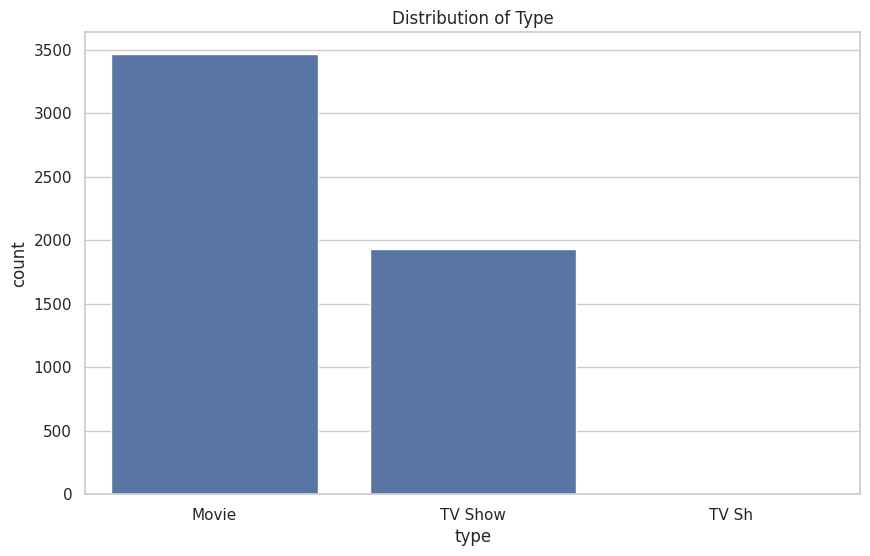

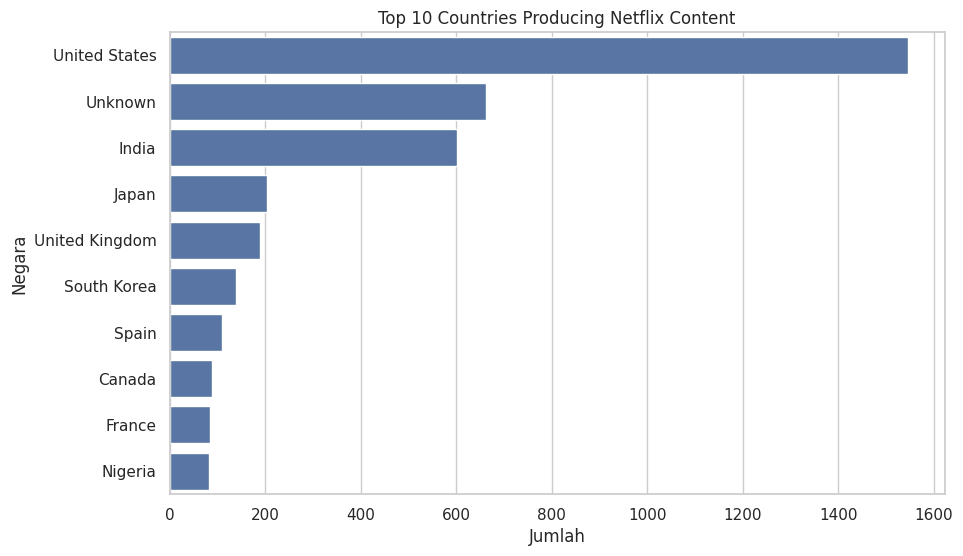

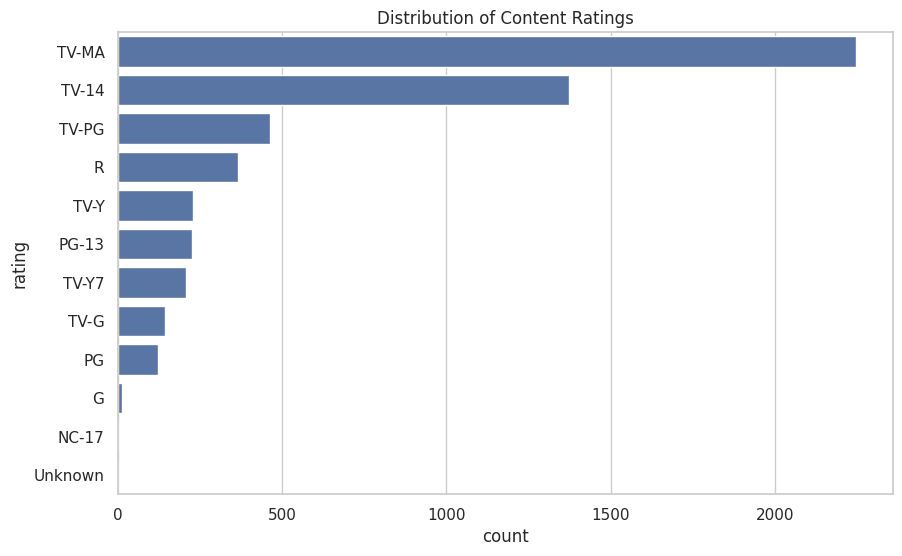

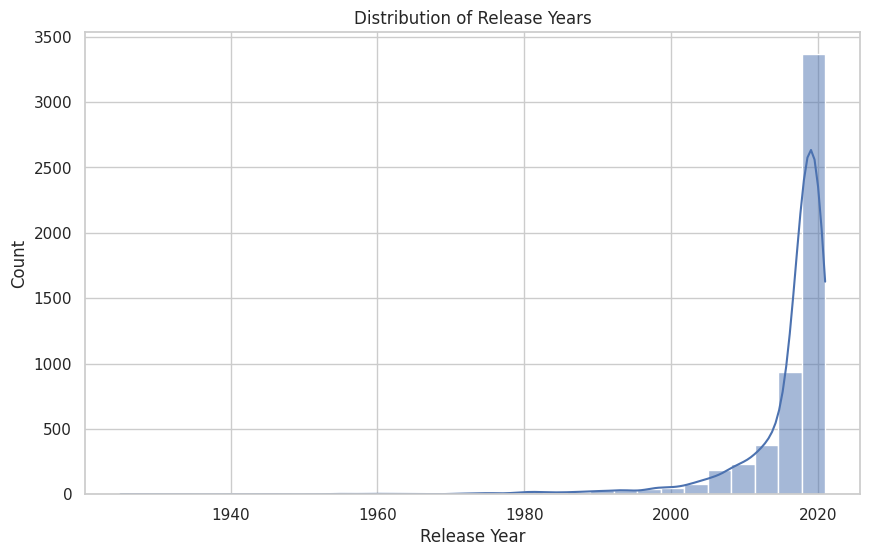

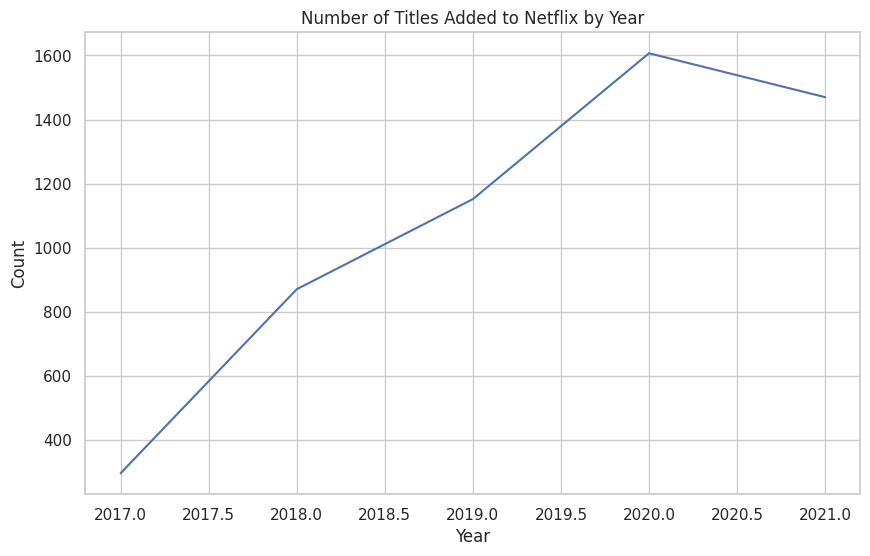

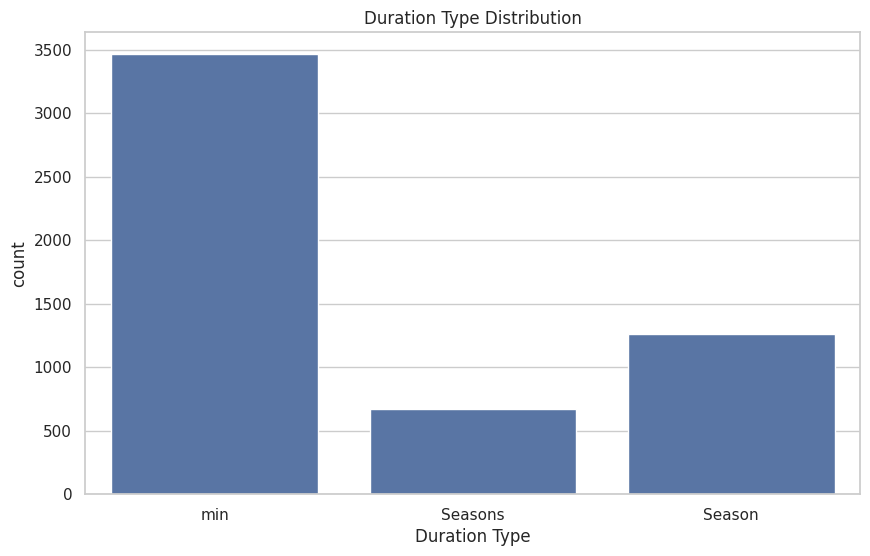

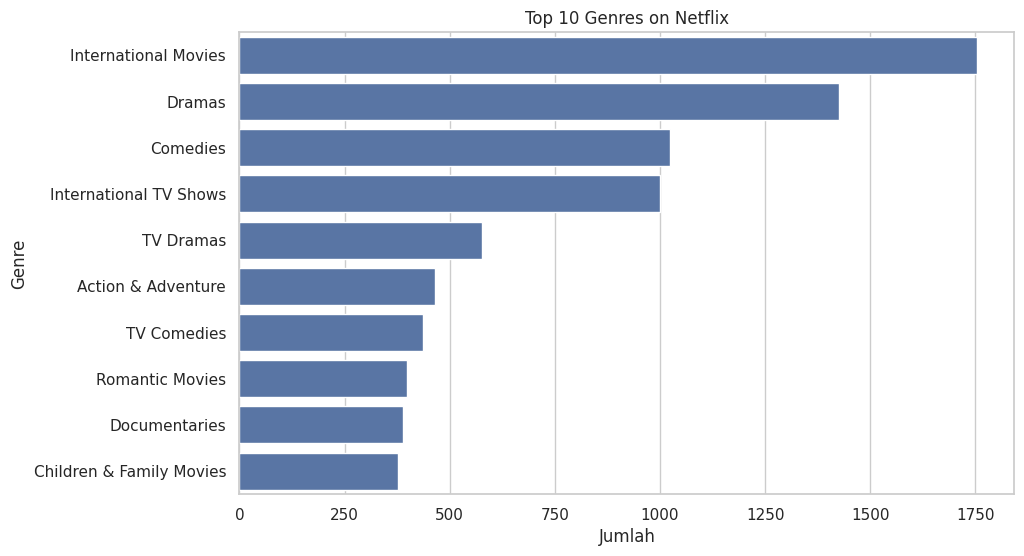

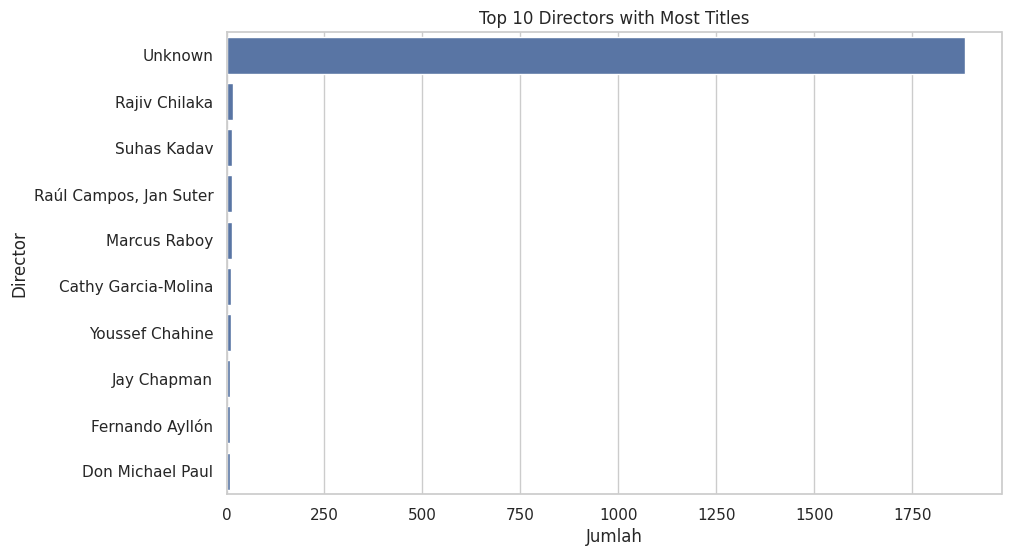

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Type
sns.countplot(data=df, x="type")
plt.title("Distribution of Type")
plt.show()

# 2. Country (Top 10)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Jumlah")
plt.ylabel("Negara")
plt.show()

# 3. Rating
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

# 4. Release Year
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.show()

# 5. Year Added
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Titles Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 6. Duration Type
sns.countplot(data=df, x='duration_type')
plt.title("Duration Type Distribution")
plt.xlabel("Duration Type")
plt.show()

# 7. Genres
top_genres = dict(Counter(flat_genres).most_common(10))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Jumlah")
plt.ylabel("Genre")
plt.show()

# 8. Directors
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Jumlah")
plt.ylabel("Director")
plt.show()


In [5]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [7]:
df['type'].value_counts()
df['country'].value_counts()


,count
country,
United States,1545
Unknown,663
India,602
Japan,203
United Kingdom,190
...,...
"Denmark, Singapore, Canada, United States",1
"United States, France, Denmark",1
"United States, China, Colombia",1


In [9]:
from collections import Counter

# Drop baris dengan NaN di 'listed_in'
genre_list = df['listed_in'].dropna().str.split(', ')

# Flatten list of lists
flat_genres = [genre.strip() for sublist in genre_list for genre in sublist]

# Hitung jumlah tiap genre
genre_counts = Counter(flat_genres)

# Lihat 10 genre teratas
print(genre_counts.most_common(10))


[('International Movies', 1755), ('Dramas', 1426), ('Comedies', 1025), ('International TV Shows', 1000), ('TV Dramas', 576), ('Action & Adventure', 464), ('TV Comedies', 436), ('Romantic Movies', 398), ('Documentaries', 389), ('Children & Family Movies', 377)]


<Axes: xlabel='year_added'>

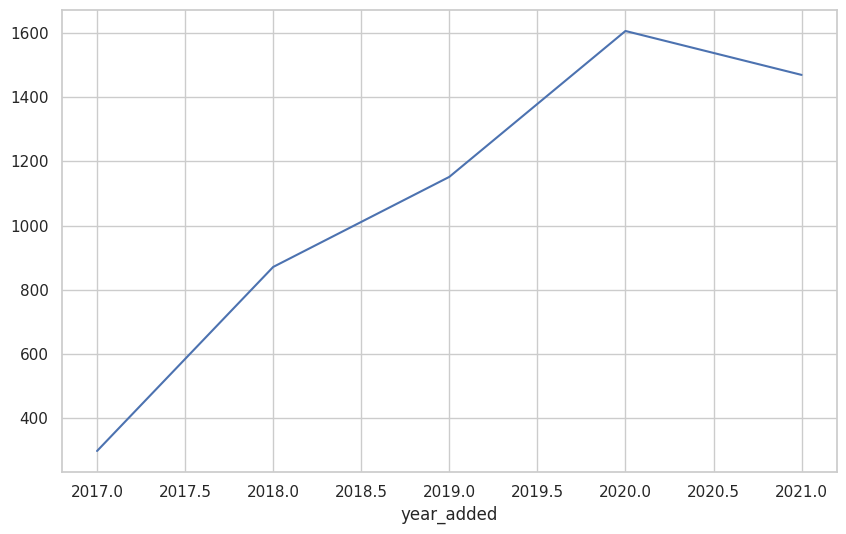

In [10]:
df['year_added'].value_counts().sort_index().plot(kind='line')


<Axes: xlabel='type', ylabel='count'>

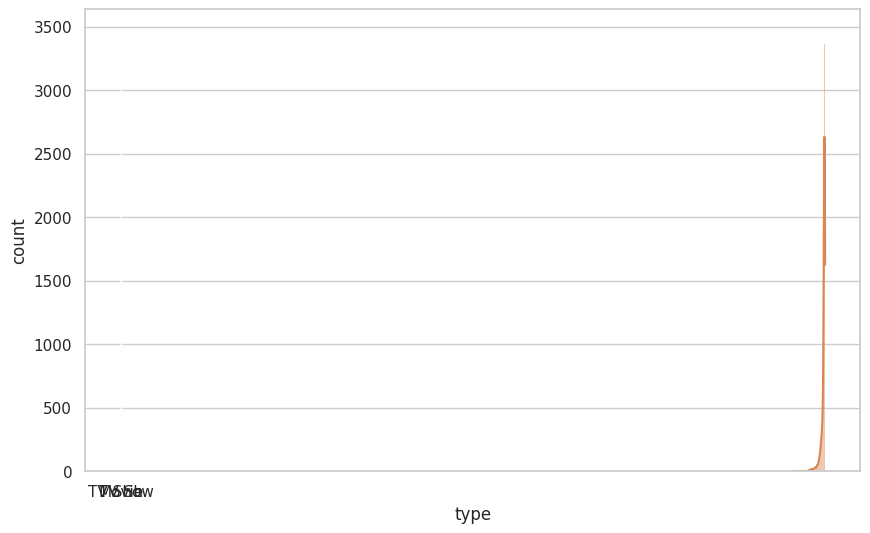

In [11]:
sns.countplot(data=df, x="type")
sns.histplot(df['release_year'], bins=30, kde=True)
